In [37]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [38]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [39]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [40]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [41]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key

In [42]:
# Create an empty list to hold the weather data
city_data = []
# Print the begining of the logging.
print("Beginning Data Retrieval")
print("------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list
#for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        #time.sleep(60)
    #Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]
     
#Every time we want to reference the city in our code, we need to use the indexing on the cities list. Unfortunately, 
#this will cause programming errors when we are building the city_url because it adds the index, not the city name, 
#to the city_url. To fix this issue, we need to create another for loop to get the city from the cities list.
#We should use enumerate: for i, item in enumerate(list)

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | mopipi
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | naze
Processing Record 5 of Set 1 | atar
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | namatanai
Processing Record 9 of Set 1 | kruisfontein
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | kalomo
City not found. Skipping...
Processing Record 19 of Set 1 | aranos
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | coruripe
Processing Record 23 of Set 1 | nalut
P

Processing Record 37 of Set 4 | arak
Processing Record 38 of Set 4 | dolores
Processing Record 39 of Set 4 | dunedin
Processing Record 40 of Set 4 | kushmurun
Processing Record 41 of Set 4 | isangel
Processing Record 42 of Set 4 | otradnoye
Processing Record 43 of Set 4 | kavaratti
Processing Record 44 of Set 4 | gwadar
Processing Record 45 of Set 4 | ribeira grande
Processing Record 46 of Set 4 | atocha
Processing Record 47 of Set 4 | mocambique
City not found. Skipping...
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | nizhniy odes
Processing Record 50 of Set 4 | point pedro
Processing Record 1 of Set 5 | kracheh
City not found. Skipping...
Processing Record 2 of Set 5 | kalmunai
Processing Record 3 of Set 5 | batticaloa
Processing Record 4 of Set 5 | hirara
Processing Record 5 of Set 5 | marawi
Processing Record 6 of Set 5 | sinnamary
Processing Record 7 of Set 5 | castro
Processing Record 8 of Set 5 | ugoofaaru
Processing Record 9 of Set 5 | bilma
Processing R

Processing Record 24 of Set 8 | minsk
Processing Record 25 of Set 8 | muroto
Processing Record 26 of Set 8 | rodrigues alves
Processing Record 27 of Set 8 | walvis bay
Processing Record 28 of Set 8 | hun
Processing Record 29 of Set 8 | bokspits
City not found. Skipping...
Processing Record 30 of Set 8 | dzhebariki-khaya
Processing Record 31 of Set 8 | nioki
Processing Record 32 of Set 8 | shieli
Processing Record 33 of Set 8 | mehamn
Processing Record 34 of Set 8 | solnechnyy
Processing Record 35 of Set 8 | makakilo city
Processing Record 36 of Set 8 | ihosy
Processing Record 37 of Set 8 | redmond
Processing Record 38 of Set 8 | shubarkuduk
Processing Record 39 of Set 8 | taoudenni
Processing Record 40 of Set 8 | sainte-suzanne
Processing Record 41 of Set 8 | dunmore town
Processing Record 42 of Set 8 | mingaora
Processing Record 43 of Set 8 | coihaique
Processing Record 44 of Set 8 | chokurdakh
Processing Record 45 of Set 8 | bryan
Processing Record 46 of Set 8 | urdzhar
City not foun

Processing Record 13 of Set 12 | sangar
Processing Record 14 of Set 12 | stornoway
Processing Record 15 of Set 12 | upanema
Processing Record 16 of Set 12 | gidam
Processing Record 17 of Set 12 | villa union
Processing Record 18 of Set 12 | deputatskiy
Processing Record 19 of Set 12 | tshikapa
Processing Record 20 of Set 12 | khandbari
Processing Record 21 of Set 12 | ndola
Processing Record 22 of Set 12 | viseu
Processing Record 23 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 24 of Set 12 | oktyabrskiy
Processing Record 25 of Set 12 | hermiston
Processing Record 26 of Set 12 | lake city
Processing Record 27 of Set 12 | sataua
City not found. Skipping...
Processing Record 28 of Set 12 | mata de sao joao
Processing Record 29 of Set 12 | panlaitan
Processing Record 30 of Set 12 | jaru
Processing Record 31 of Set 12 | rio brilhante
Processing Record 32 of Set 12 | mocuba
Processing Record 33 of Set 12 | nemuro
Processing Record 34 of Set 12 | reefton
City not found. 

In [43]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,-16.44,69,20,5.14,CA,2022-04-12 16:44:08
1,Mopipi,-21.1833,24.8833,26.84,36,75,3.25,BW,2022-04-12 16:44:08
2,Barrow,71.2906,-156.7887,-16.99,66,100,4.63,US,2022-04-12 16:44:09
3,Naze,28.3667,129.4833,20.51,91,13,2.45,JP,2022-04-12 16:44:09
4,Atar,20.5169,-13.0499,36.92,8,97,4.49,MR,2022-04-12 16:44:09
5,Ushuaia,-54.8000,-68.3000,8.79,81,75,7.72,AR,2022-04-12 16:44:09
6,Esperance,-33.8667,121.9000,17.91,90,75,3.87,AU,2022-04-12 16:44:10
7,Namatanai,-3.6667,152.4333,25.78,76,21,2.70,PG,2022-04-12 16:44:10
8,Kruisfontein,-34.0033,24.7314,19.65,76,12,3.54,ZA,2022-04-12 16:44:10
9,Rikitea,-23.1203,-134.9692,26.25,69,38,7.78,PF,2022-04-12 16:44:11


In [49]:
# Reorder the columns in DataFrame: 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2022-04-12 16:44:08,62.4560,-114.3525,-16.44,69,20,5.14
1,Mopipi,BW,2022-04-12 16:44:08,-21.1833,24.8833,26.84,36,75,3.25
2,Barrow,US,2022-04-12 16:44:09,71.2906,-156.7887,-16.99,66,100,4.63
3,Naze,JP,2022-04-12 16:44:09,28.3667,129.4833,20.51,91,13,2.45
4,Atar,MR,2022-04-12 16:44:09,20.5169,-13.0499,36.92,8,97,4.49
5,Ushuaia,AR,2022-04-12 16:44:09,-54.8000,-68.3000,8.79,81,75,7.72
6,Esperance,AU,2022-04-12 16:44:10,-33.8667,121.9000,17.91,90,75,3.87
7,Namatanai,PG,2022-04-12 16:44:10,-3.6667,152.4333,25.78,76,21,2.70
8,Kruisfontein,ZA,2022-04-12 16:44:10,-34.0033,24.7314,19.65,76,12,3.54
9,Rikitea,PF,2022-04-12 16:44:11,-23.1203,-134.9692,26.25,69,38,7.78


In [50]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the Citi_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [64]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

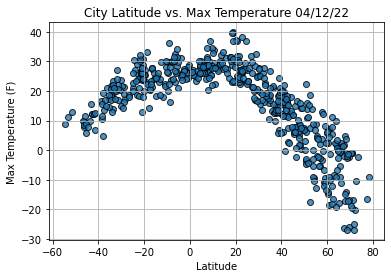

In [71]:
# Import time module
import time
#print(time.strftime("%x"))

# Build scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, 
            edgecolor='black', linewidth=1, 
            marker='o', alpha = 0.8, 
            label = 'cities')

# Incorporate the other graph propertis.
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

#Show plot
plt.show()

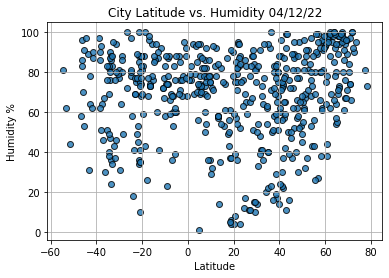

In [76]:
# Build scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, 
            edgecolor='black', linewidth=1, 
            marker='o', alpha = 0.8, 
            label = 'cities')

# Incorporate the other graph propertis.
plt.title("City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig2.png')

#Show plot
plt.show()

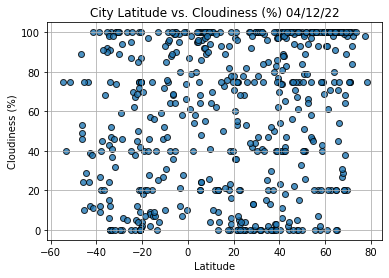

In [77]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, 
            edgecolor='black', linewidth=1, 
            marker='o', alpha = 0.8, 
            label = 'cities')

# Incorporate the other graph propertis.
plt.title("City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')

#Show plot
plt.show()

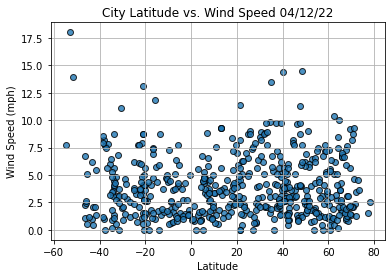

In [78]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed, 
            edgecolor='black', linewidth=1, 
            marker='o', alpha = 0.8, 
            label = 'cities')

# Incorporate the other graph propertis.
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

#Show plot
plt.show()